<h2> An End-to-End Machine Learning Project </2>

<h3> The Problem </h3>

Model the attrition of healthcare employees (whether they left or not) based on information including the employees' general information and their working information. The columns in the data are as follows

- EmployeeID
- Age
- <b>Attrition</b>
- BusinessTravel
- DailyRate
- Department
- DistanceFromHome
- Education
- EducationField
- EnvironmentSatisfaction
- Gender
- HourlyRate
- JobInvolvement
- JobLevel
- JobRole
- JobSatisfaction
- MaritalStatus
- MonthlyIncome
- MonthlyRate
- NumCompaniesWorked
- Over18
- OverTime
- PercentSalaryHike
- PerformanceRating
- RelationshipSatisfaction
- StandardHours
- Shift
- TotalWorkingYears
- TrainingTimesLastYear
- WorkLifeBalance
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

<h3> Loading the Data </h3>

This data is a typical csv file with headers. We can use the default settings of read_csv()

In [1]:
import pandas as pd
import numpy as np

attr = pd.read_csv('attrition.csv')
attr.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41.0,No,Travel_Rarely,1102.0,Cardiology,1.0,2.0,Life Sciences,2.0,...,1.0,80.0,NaN,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,1200302,49.0,No,Travel_Frequently,279.0,Maternity,8.0,1.0,Life Sciences,3.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,1060315,37.0,Yes,Travel_Rarely,1373.0,Maternity,2.0,NaN,Other,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,1272912,33.0,No,Travel_Frequently,1392.0,Maternity,3.0,4.0,Life Sciences,4.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,1414939,27.0,No,Travel_Rarely,591.0,Maternity,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,NaN,3.0,3.0,2.0,NaN,NaN,2.0


In [2]:
attr.shape

(1676, 34)

<h3> First Look into the Data </h3>

First, the dataset structure. As previously mentioned, we can use dtypes for a list of each column's data type. Another similar method that provides more information is DataFrame.info() which will give the number of rows and columns, non-null count (non-missing) and column types. Take note on the non-null count; any column with a non-null count less than the total number of rows in the dataset means it has missing values that we must handle later on.

Our target in this data is <b>Attrition</b>

In [3]:
attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1676 non-null   int64  
 1   Age                       1508 non-null   float64
 2   Attrition                 1676 non-null   object 
 3   BusinessTravel            1676 non-null   object 
 4   DailyRate                 1508 non-null   float64
 5   Department                1676 non-null   object 
 6   DistanceFromHome          1508 non-null   float64
 7   Education                 1508 non-null   float64
 8   EducationField            1676 non-null   object 
 9   EnvironmentSatisfaction   1508 non-null   float64
 10  Gender                    1676 non-null   object 
 11  HourlyRate                1508 non-null   float64
 12  JobInvolvement            1508 non-null   float64
 13  JobLevel                  1508 non-null   float64
 14  JobRole 

Based on the results from info(), the majority of the columns are considered numeric (indicated by the int64 or float64 type). Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18 and OverTime are considered class (indicated by the object type). 

Did this data get loaded in correctly?

Next, we use describe() to show statistics of all numeric columns. We can see all the numerical columns have some missing values which is indicated by the count being 1508 whereas the total number of rows in this data is 1676.

In [4]:
attr.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,...,1508.000000,1508.0,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,1.456796e+06,36.778515,807.602122,9.171088,2.897878,2.710875,65.763263,2.729443,2.060345,2.726790,...,2.707560,80.0,0.806366,11.345491,2.823607,2.768568,7.090186,4.263263,2.216844,4.169761
std,2.487486e+05,9.077416,401.512606,8.147034,1.022726,1.102552,20.185709,0.713698,1.117962,1.107805,...,1.075773,0.0,0.850254,7.865956,1.298532,0.711191,6.162785,3.618731,3.257994,3.547436
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,471.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,35.000000,805.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1169.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


We can further observe their distributions with histograms

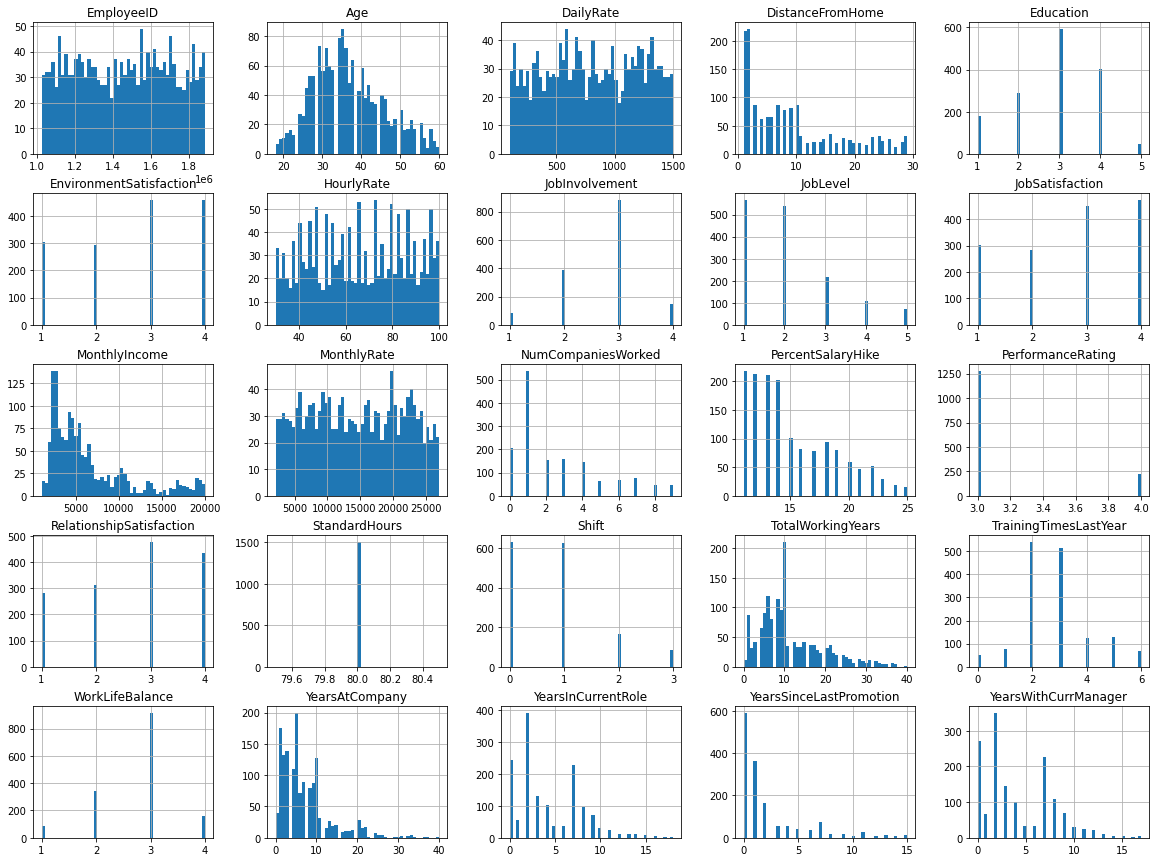

In [5]:
from matplotlib import pyplot as plt

attr.hist(bins=50, figsize=(20,15))
plt.show()

For the only class column - ocean_proximity - we can use a frequency table and a bar chart

In [6]:
attr['Attrition'].dtypes == object

True

In [7]:
[column for column in attr.columns if attr[column].dtypes == object]

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [8]:
for col in [column for column in attr.columns if attr[column].dtypes == object]:
    print(col)
    print(attr[col].value_counts())
    print()

Attrition
No     1477
Yes     199
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64

Department
Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

EducationField
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

Gender
Male      998
Female    678
Name: Gender, dtype: int64

JobRole
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

MaritalStatus
Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

Over18
Y    1676
Name: Over18, dtype: int64

OverTime
No     1200
Yes     476
Name: OverTime, dtype: int64



<h3> Train/Test Splitting </h3>

A quick look into the data is all you should done before train/test splitting. As we mentioned in the first module, a machine learning model is usually trained to work on future unknown data. For this reason, we need some measurements that are able to reflect its performance on unknown data instead of the data the model is trained on. This leads to train/test splitting -- we split the dataset we have into a training set for model training, and a testing set that will be kept untouch until we have finalized and trained models. There is another reason for train test splitting that we will discuss in the next module.

This means, every steps, including data processing are done in the training set. The testing set will be kept untouch until we are ready to evaluate our models. 

There are different ways of splitting a data. In this example, we will do random split. However, before that, we need to separate the label column and the rest of the column.

In [9]:
#separate X and y as we discussed last time
attr_X = attr.drop('Attrition', axis=1)
attr_y = attr['Attrition']

In [10]:
#verify X does not have Attrition column
attr_X

,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41.0,Travel_Rarely,1102.0,Cardiology,1.0,2.0,Life Sciences,2.0,Female,...,1.0,80.0,NaN,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,1200302,49.0,Travel_Frequently,279.0,Maternity,8.0,1.0,Life Sciences,3.0,Male,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,1060315,37.0,Travel_Rarely,1373.0,Maternity,2.0,NaN,Other,4.0,Male,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,1272912,33.0,Travel_Frequently,1392.0,Maternity,3.0,4.0,Life Sciences,4.0,Female,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,1414939,27.0,Travel_Rarely,591.0,Maternity,2.0,1.0,Medical,1.0,Male,...,4.0,80.0,1.0,NaN,3.0,3.0,2.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26.0,Travel_Rarely,471.0,Neurology,24.0,3.0,Technical Degree,NaN,Male,...,2.0,80.0,0.0,NaN,3.0,1.0,1.0,0.0,0.0,0.0
1672,1152327,46.0,Travel_Rarely,NaN,Cardiology,10.0,3.0,Marketing,3.0,Female,...,3.0,80.0,1.0,15.0,3.0,3.0,3.0,2.0,1.0,2.0
1673,1812428,20.0,Travel_Rarely,959.0,Maternity,1.0,3.0,Life Sciences,4.0,Female,...,4.0,80.0,0.0,1.0,0.0,4.0,1.0,0.0,NaN,0.0
1674,1812429,NaN,Travel_Rarely,466.0,Neurology,1.0,1.0,Life Sciences,4.0,Female,...,3.0,80.0,1.0,NaN,3.0,3.0,21.0,6.0,11.0,8.0


In [11]:
#verify y is Attrition column
attr_y

0        No
1        No
2       Yes
3        No
4        No
       ... 
1671    Yes
1672     No
1673     No
1674     No
1675     No
Name: Attrition, Length: 1676, dtype: object

In [12]:
#now we randomly split the data. 20% of the rows will be left for testing

from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(attr_X, attr_y, test_size=0.2)

#verifying the sets' shapes
trainX.shape, testX.shape, trainY.shape, testY.shape

((1340, 33), (336, 33), (1340,), (336,))

<h3> Preprocessing the Training Data </h3>

In this data, the first thing is to drop EmployeeID. As we mentioned in earlier modules, ID columns have their usages in specific tasks like time series, identity detections, longitudinal analysis, etc. However, in general classification cases like this, ID does not contribute and will even cause noises in the models.

Next time, we will discuss sklearn pipeline to process data. For this module, let's use Pandas to understand the details of each step.

In [13]:
trainX_prc = trainX.copy()
trainX_prc.drop('EmployeeID', axis=1, inplace=True) #since we make a copy of the original data, 
                                                    #we can set inplace=True to directly modify the new dataframe

Another column to be drop is Over18. We can see from its frequency count that the column has a single unique value (in other words, it has no variances). Columns like this will not contribute to any models at all.

In [14]:
trainX_prc.drop('Over18', axis=1, inplace=True)

In [15]:
trainX_prc.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
447,40.0,Travel_Rarely,302.0,Neurology,NaN,3.0,Life Sciences,2.0,Female,NaN,...,3.0,80.0,0.0,22.0,3.0,3.0,20.0,NaN,5.0,13.0
1510,31.0,Travel_Rarely,655.0,Neurology,7.0,4.0,Life Sciences,4.0,Male,48.0,...,NaN,80.0,1.0,10.0,3.0,2.0,7.0,7.0,1.0,7.0
495,44.0,Travel_Rarely,1315.0,Neurology,3.0,NaN,Other,4.0,Male,35.0,...,1.0,80.0,1.0,26.0,2.0,4.0,2.0,2.0,0.0,1.0
1073,54.0,Travel_Frequently,1050.0,Neurology,11.0,4.0,Medical,NaN,Female,87.0,...,1.0,80.0,1.0,26.0,2.0,3.0,14.0,9.0,1.0,12.0
1038,28.0,Travel_Rarely,866.0,Cardiology,5.0,3.0,Medical,4.0,Male,84.0,...,4.0,80.0,0.0,6.0,4.0,3.0,5.0,4.0,1.0,3.0


Next, we need to fill missing values in the columns. In this data, all numerical columns have some missing values. We can use the fillna() method of a pandas DataFrame to do that. Similarly, we set inplace=True to make direct changes to the dataframe

In [16]:
num_cols = [column for column in trainX_prc.columns if trainX_prc[column].dtypes == np.float64 
            or trainX_prc[column].dtypes == np.int64]

trainX_prc[num_cols] = trainX_prc[num_cols].fillna(trainX_prc[num_cols].median())

trainX_prc.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
447,40.0,Travel_Rarely,302.0,Neurology,7.0,3.0,Life Sciences,2.0,Female,66.0,...,3.0,80.0,0.0,22.0,3.0,3.0,20.0,3.0,5.0,13.0
1510,31.0,Travel_Rarely,655.0,Neurology,7.0,4.0,Life Sciences,4.0,Male,48.0,...,3.0,80.0,1.0,10.0,3.0,2.0,7.0,7.0,1.0,7.0
495,44.0,Travel_Rarely,1315.0,Neurology,3.0,3.0,Other,4.0,Male,35.0,...,1.0,80.0,1.0,26.0,2.0,4.0,2.0,2.0,0.0,1.0
1073,54.0,Travel_Frequently,1050.0,Neurology,11.0,4.0,Medical,3.0,Female,87.0,...,1.0,80.0,1.0,26.0,2.0,3.0,14.0,9.0,1.0,12.0
1038,28.0,Travel_Rarely,866.0,Cardiology,5.0,3.0,Medical,4.0,Male,84.0,...,4.0,80.0,0.0,6.0,4.0,3.0,5.0,4.0,1.0,3.0


And verify the result by describe(). We can see all columns have counts equal to the number of rows in trainX now.

In [17]:
trainX_prc.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,...,1340.000000,1340.0,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,36.820149,801.029851,8.981343,2.903731,2.761940,65.406716,2.774627,2.065672,2.755970,6333.573134,...,2.726119,80.0,0.838806,11.221642,2.861194,2.793284,6.869403,4.139552,2.108209,3.973881
std,8.680352,380.737237,7.731130,0.980231,1.041721,19.483383,0.672703,1.069022,1.057426,4529.826313,...,1.018311,0.0,0.823108,7.486666,1.223428,0.675916,5.874601,3.473242,3.131582,3.362590
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,507.750000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,3208.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,791.500000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4807.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,1125.250000,12.000000,4.000000,4.000000,81.000000,3.000000,2.000000,4.000000,7385.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Next, we need to transform all class columns in the data to numbers since most models cannot handle class values by themselves. We will use a technique that is called dummy variables that will be describe in the next module

In [18]:
cat_cols = [column for column in trainX_prc.columns if trainX_prc[column].dtypes == object]

trainX_prc = pd.get_dummies(trainX_prc, columns=cat_cols)

trainX_prc.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
447,40.0,302.0,7.0,3.0,2.0,66.0,3.0,4.0,3.0,13237.0,...,0,0,0,0,1,0,0,1,1,0
1510,31.0,655.0,7.0,4.0,4.0,48.0,3.0,2.0,4.0,5915.0,...,0,0,1,0,0,1,0,0,1,0
495,44.0,1315.0,3.0,3.0,4.0,35.0,3.0,5.0,3.0,19513.0,...,0,0,0,1,0,0,1,0,0,1
1073,54.0,1050.0,11.0,4.0,3.0,87.0,3.0,4.0,4.0,16032.0,...,0,0,0,1,0,1,0,0,1,0
1038,28.0,866.0,5.0,3.0,4.0,84.0,3.0,2.0,1.0,8463.0,...,0,0,1,0,0,0,0,1,1,0


Finally, we verify that all columns in the processed data are now numeric (uint8 is unsigned integer using 8 bits, which is also a numeric data type).

In [19]:
trainX_prc.dtypes

Age                                 float64
DailyRate                           float64
DistanceFromHome                    float64
Education                           float64
EnvironmentSatisfaction             float64
HourlyRate                          float64
JobInvolvement                      float64
JobLevel                            float64
JobSatisfaction                     float64
MonthlyIncome                       float64
MonthlyRate                         float64
NumCompaniesWorked                  float64
PercentSalaryHike                   float64
PerformanceRating                   float64
RelationshipSatisfaction            float64
StandardHours                       float64
Shift                               float64
TotalWorkingYears                   float64
TrainingTimesLastYear               float64
WorkLifeBalance                     float64
YearsAtCompany                      float64
YearsInCurrentRole                  float64
YearsSinceLastPromotion         

The training data is now ready for modeling

<h3> Try and Pick a Good Model </h3>

As the target is a class column, this is a classification problem. We will try several different models to pick a good one

- Logistic regression
- Decision tree
- Random Forest

We will discuss all models later on, so don't worry if you are not familiar with them right now. 

So how do we compare the models? In classification problems like this, we will use accuracy rate, which essentially means how much of the data is preditected with the correct labels.

Now we can try different models. SKLearn is a very easy package to learn. All model will have the below functions:
- fit(): fit a model on the given data (and label, if applicable). Also mean training the model
- predict(): predict the label of the given data using the fitted model

Note that for all models below, we are still not using testing data

<h4>Logistic Regression</h4>

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)              #create a LogisticRegression model
lr.fit(trainX_prc, trainY)                           #fit the model

lr.score(trainX_prc, trainY)                         #score (evaluate the trained model on the training data)

0.9373134328358209

<h4>Decision Tree</h4>

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(trainX_prc, trainY)

tree.score(trainX_prc, trainY)  

1.0

An accuracy rate of 1.0 means that 100% of the data is predicted with the correct labels. This is a sign of potential problems

<h4>Random Forest</h4>

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(trainX_prc, trainY)

forest.score(trainX_prc, trainY)  

0.9888059701492538

<h4>Finetuning Models</h4>

The three models we have just trained are only with their default settings which are not optimal most of the times. After choosing your models, another very important step is to <b>finetune</b> them, which essentially means to search for an optimal set of settings so that our models are at their best performance. We will discuss this in another module, for now, the settings we want to finetune for the three models are as follows. Note that in practice, there are more to tune in these models.
- Logistic regression: which columns to use
- Decision tree: how deep is the tree
- Random forest: how many trees are in the forest

<h5>Tuning Logistic Regression</h5>

In [23]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(lr, prefit=True)
trainX_prc_lr = selector.transform(trainX_prc)
trainX_prc_lr.shape

C:\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(1340, 16)

In [24]:
lr_reduced = LogisticRegression(max_iter=5000)
lr_reduced.fit(trainX_prc_lr,trainY)
lr_reduced.score(trainX_prc_lr,trainY)

0.8985074626865671

<h5>Tuning Decision Tree</h5>

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [3,4,5,6]},
   ]

tree_cv = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_cv, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 4, 5, 6]}], return_train_score=True,
             scoring='accuracy')

In [26]:
best_tree = grid_search.best_estimator_

best_tree.score(trainX_prc, trainY)

0.9119402985074627

<h5>Tuning Random Forest</h5>

In [27]:
param_grid = [
    {'n_estimators': [5,10,15,20]},
   ]

forest_cv = RandomForestClassifier()

grid_search = GridSearchCV(forest_cv, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'n_estimators': [5, 10, 15, 20]}],
             return_train_score=True, scoring='accuracy')

In [28]:
best_forest = grid_search.best_estimator_

best_forest.score(trainX_prc, trainY)

0.9970149253731343

<h3>Applying to Test Data</h3>

The best model can then be used on the test data. First, we have to process the test data like we did the training data

In [29]:
testX_prc = testX.copy()
testX_prc.drop('EmployeeID', axis=1, inplace=True)
testX_prc.drop('Over18', axis=1, inplace=True)
testX_prc[num_cols] = testX_prc[num_cols].fillna(trainX_prc[num_cols].median())
testX_prc = pd.get_dummies(testX_prc, columns=cat_cols)

testX_prc.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
717,36.0,955.0,4.0,2.0,4.0,83.0,3.0,2.0,3.0,4163.0,...,0,0,1,0,0,0,0,1,0,1
631,36.0,1278.0,8.0,3.0,1.0,77.0,2.0,1.0,1.0,4807.0,...,0,0,0,1,0,0,1,0,1,0
624,32.0,638.0,8.0,2.0,3.0,91.0,4.0,2.0,3.0,5175.0,...,0,0,0,1,0,0,1,0,1,0
104,37.0,1040.0,2.0,2.0,3.0,100.0,2.0,2.0,4.0,5163.0,...,0,0,1,0,0,1,0,0,1,0
1204,55.0,1441.0,22.0,3.0,1.0,94.0,2.0,1.0,2.0,3537.0,...,0,0,0,1,0,1,0,0,1,0


Then we can use score() from the models without retraining. Let's see how the default models (trained without tuning) perform

In [30]:
lr.score(testX_prc, testY)

0.9255952380952381

In [31]:
tree.score(testX_prc, testY)

0.8720238095238095

In [32]:
forest.score(testX_prc, testY)

0.8958333333333334

Then, the tuned models

In [33]:
testX_prc_lr = selector.transform(testX_prc)
lr_reduced.score(testX_prc_lr, testY)

C:\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


0.8809523809523809

In [34]:
best_tree.score(testX_prc, testY)

0.9077380952380952

In [35]:
best_forest.score(testX_prc, testY)

0.9315476190476191

The testing accuracy rates of the models are summarized below

|Model   |Without Tuning|With Tuning|
|--------|--------------|-----------|
|Logistic|0.926         |0.881      |
|Tree    |0.872         |0.908      |
|Forest  |0.896         |0.932      |

All steps in this project are summarized in the figure below

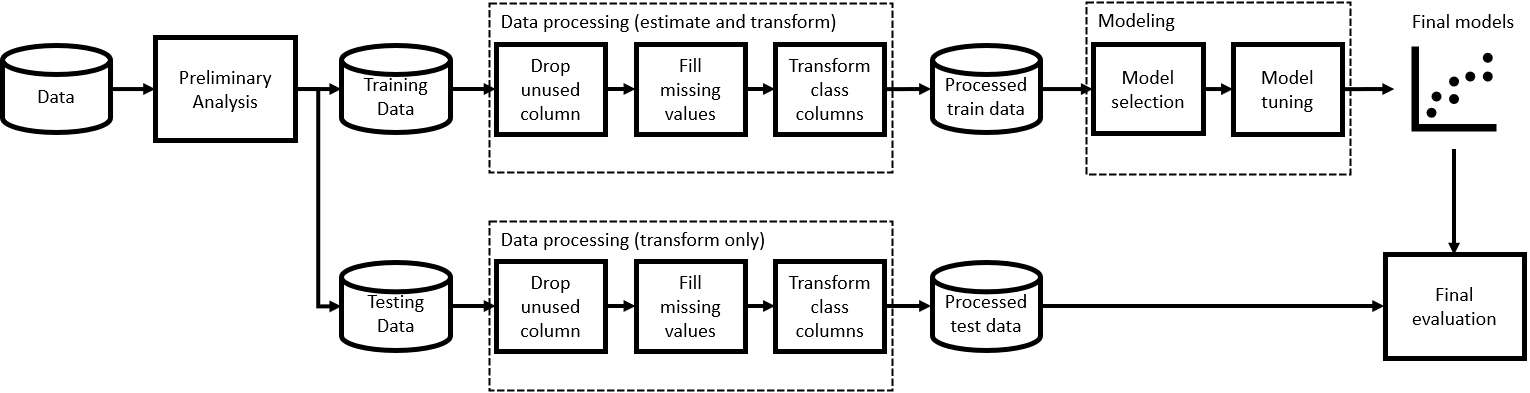